<a href="https://colab.research.google.com/github/gabrielaraujopereira/Python/blob/main/2__ExemploAnalisedasInscricoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Simples - Inscrições do Curso

### Após a Aula introdutória vamos ver como colher algumas informações Simples Usando Python

In [ ]:
import pandas as pd #Biblioteca responsável para fazer a leitura e impressão de bases de dados

### Veja neste link como armazenar uma planilha excel no Github para usar como base de dados no COLAB

In [ ]:
url = 'https://github.com/profcintiapinho/laboratorio_ia/blob/main/respostasalunos.xlsx?raw=true' #pega o caminho do arquivo excel no github
planilha = "respostas" #identifica a planilha que está os dados
base = pd.read_excel(url,planilha) #pega o caminho e a planilha exata e armazena na variável

In [ ]:
base

,Turma,interesse,computador,motivacao
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q..."
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos
...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática


In [ ]:
import matplotlib.pyplot as plt #biblioteca para gerar gráficos
import seaborn as sns #biblioteca para visualizar gráficos

<Axes: xlabel='Turma', ylabel='count'>

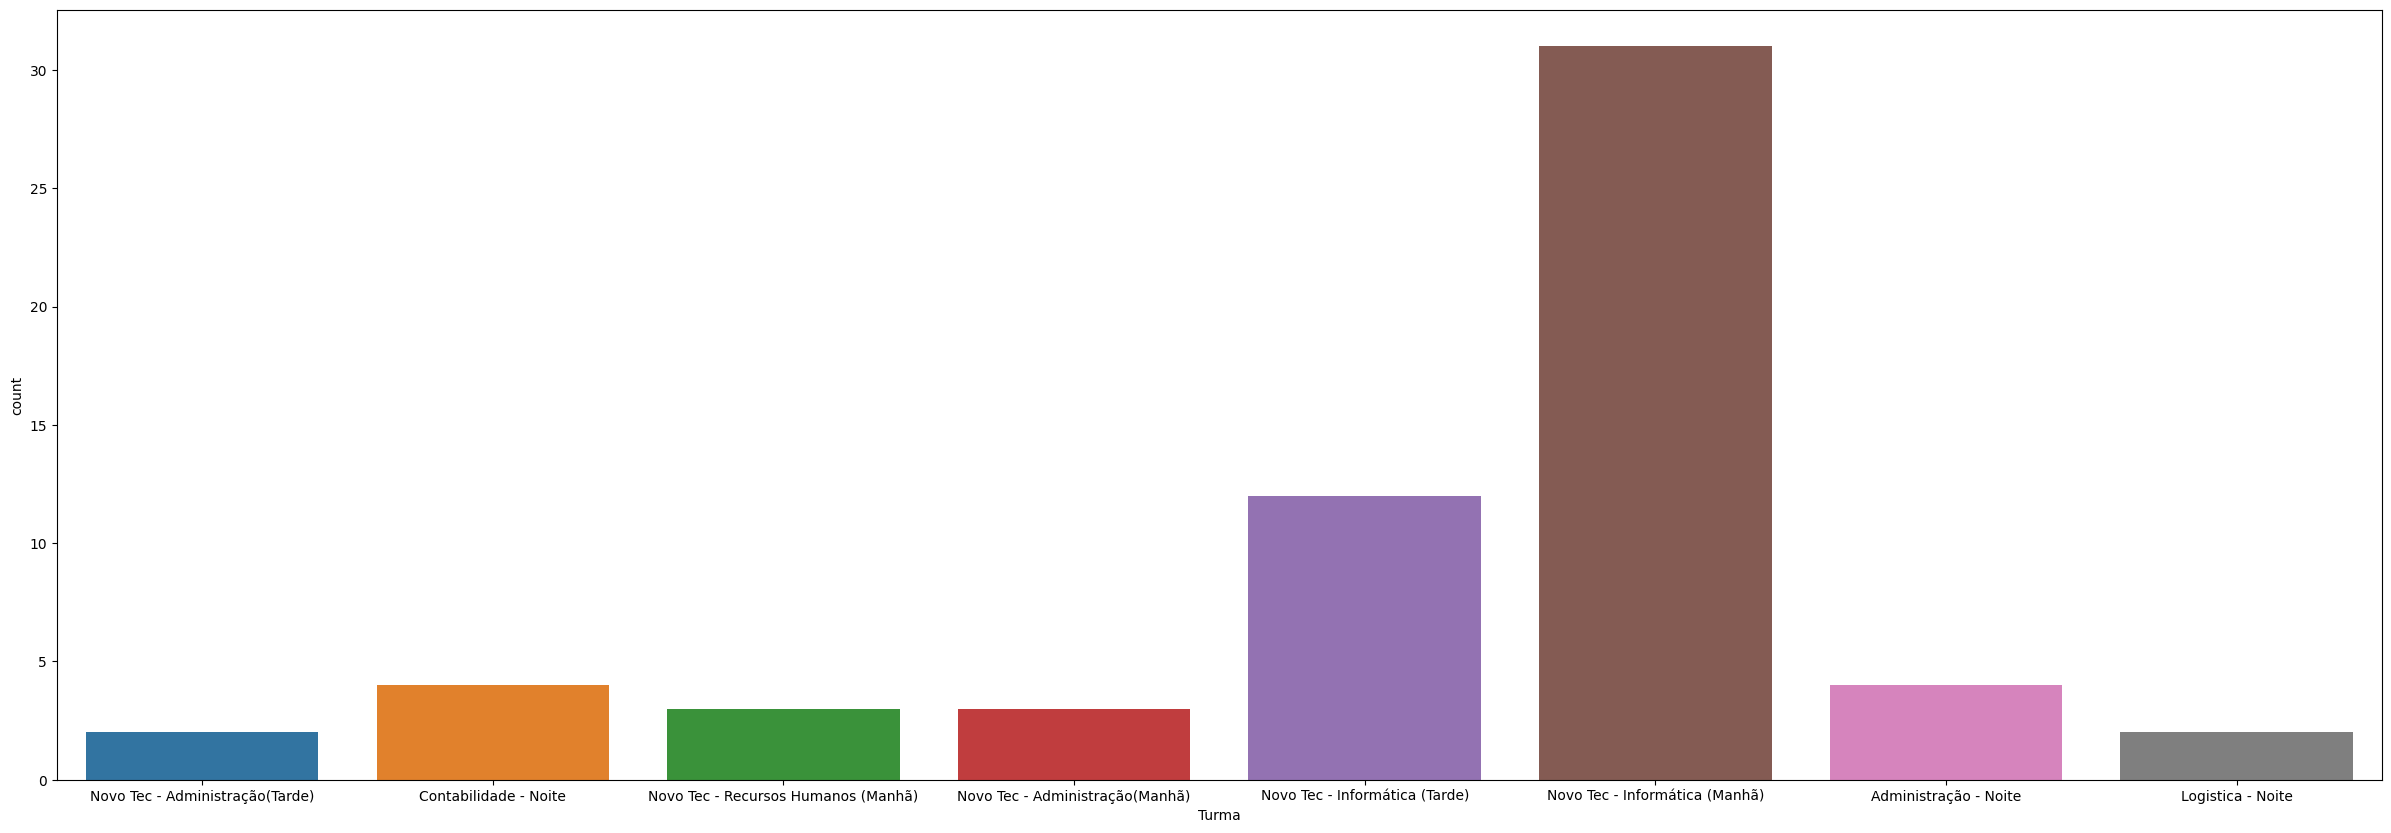

In [ ]:
plt.subplots(figsize=(30, 10))
plt.title('')
sns.countplot(x=base['Turma'])

Text(0.5, 1.0, 'Alunos possuem computadores?')

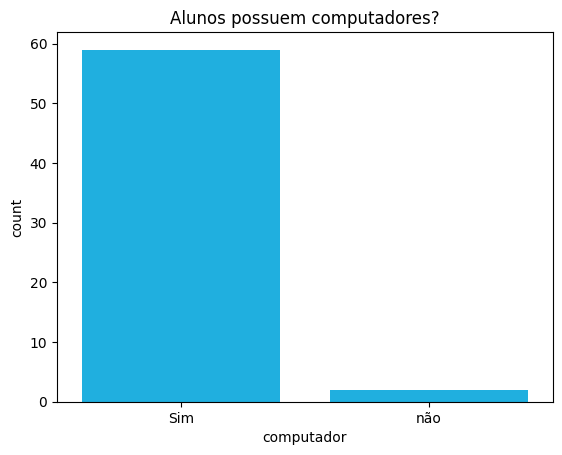

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=base['computador'], color='#00BFFF');
plt.title('Alunos possuem computadores?')

In [ ]:
base['interesse'].value_counts()

Tarde    31
Noite    30
Name: interesse, dtype: int64

In [ ]:
tarde = base.interesse.value_counts()['Tarde']
noite = base.interesse.value_counts()['Noite']

In [ ]:
x = ["Tarde", "Noite"]
y = [tarde, noite]

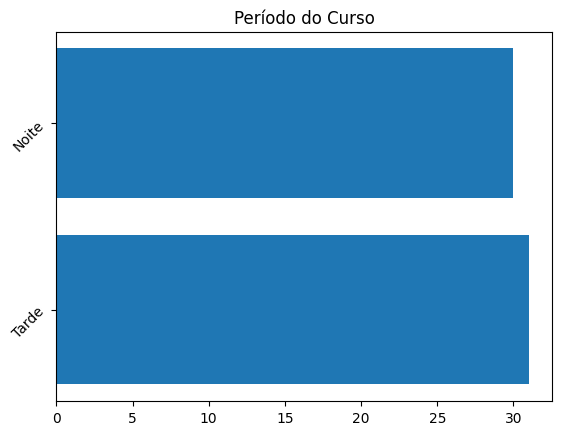

In [ ]:
plt.barh(x, y)
plt.yticks(rotation=45)
plt.title('Período do Curso')
plt.show()

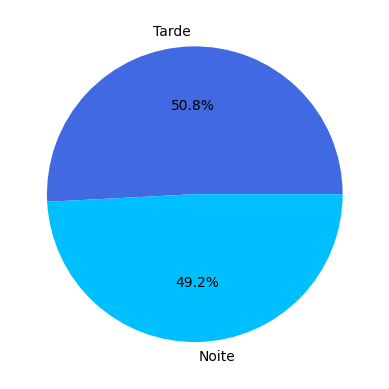

In [ ]:
cores = ['#4169E1','#00BFFF','#00008B']
plt.pie(y, labels=x, autopct='%1.1f%%', colors = cores)
plt.show()

In [ ]:
import spacy
import re

In [ ]:
!python -m spacy download pt_core_news_sm

2023-09-01 10:57:56.417095: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 77.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
pln = spacy.load('pt_core_news_sm')

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

#o que são stop words?

### stop words sao palavras da lingua portuguesa que nao trazem sentido ao texto, apenas ligam as palavras, como artigos, preposições, pronomes e etc...

In [ ]:
len(stop_words)

416

In [ ]:
"possui" in stop_words

False

In [ ]:
pln.Defaults.stop_words.add("coisas")

In [ ]:
import string
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(text):
    result = []
    pos_tag = ['ADJ', 'NOUN', 'VERB', 'PROPN'] # escolhendo apenas adjetivos, substantivos e verbos , 'VERB'
    texto = re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', text )
    doc = pln(texto.lower()) # Transformando em minúsculo
    for token in doc:
        # 3
        if(token.text in stop_words or token.text in pontuacoes):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)

        texto = ' '.join([str(elemento) for elemento in result if not elemento.isdigit()])


    #return result # 5
    return texto # 5

In [ ]:
base.motivacao=base.motivacao.astype(str)
base['limpa'] = base['motivacao'].apply(preprocessamento)

In [ ]:
base

,Turma,interesse,computador,motivacao,limpa
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...,liga aprender tecnologia
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...,conseguir automatizar processos trabalho
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q...",obter conhecimento solicitado mercado trabalho
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...,python linguagens programação fácil executar p...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos,aprimorar
...,...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...,curso extracurricular melhorar currículo
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...,curso extracurricular melhorar currículo
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...,busca conhecimentos agregar vida
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática,ampliar conhecimentos informática


In [ ]:
motivo = base['limpa'].values
juntandotudo = ''
for sentimento in motivo:
  juntandotudo += sentimento+" "

In [ ]:
juntandotudo

'liga aprender tecnologia conseguir automatizar processos trabalho obter conhecimento solicitado mercado trabalho python linguagens programação fácil executar projetos tamanhos sabendo python aprimorar conhecimentos aprimorar conhecimentos venho interessando tecnologia conhecimento adquirir conhecimentos agregar conhecimentos currículo achei interessante curso melhorar conhecimento python interessei gosto programação estudei python conhecimento indicação documentário coded bias desenvolvi interesse expandir conhecimentos futuro melhor incrementar currículo interesse interesse explorar áreas informática estudei python motivos conhecer mexe funciona adquirir conhecimento busco melhor capacitação ingressar mercado trabalho interesse tema curso gosto aprender acredito oportunidade aparece agarrada tema curso desperta interesse experiência area interesse aprender tecnologias atuais ampliar conhecimento amo áreae decidindo aprender fundamental aprender tornar profissional qualificado curiosi

In [ ]:
texto = '''Sensual e ousado, Entrevista Com o Vampiro é um dos melhores filmes que abordam o personagem que sabemos, atravessa uma longa tradição no desenvolvimento das sociedades prévias ao nosso universo contemporâneo. “Imortalizado” na virada do século XIX com o romance Drácula, de Bram Stoker, obra que podemos dizer, foi e ainda é a versão definitiva para tais monstros notívagos, sedentos por sangue, associados aos morcegos e conhecidos pela nobreza como escala social na qual estão inseridos, em 1994, essas figuras ganharam as telas do cinema numa história avassaladora para os padrões esperados de um filme com vampiros. A base para tudo isso era o romance homônimo de Anne Rice, publicado previamente, transformado em roteiro pela própria criadora do universo, texto regido por Neil Jordan, cineasta em ótima forma. Aqui, a luz é um dos únicos inimigos já conhecidos destas criaturas que estão dissociadas dos clichês semióticos envolvendo crucifixos, alho, água benta e outros elementos da tradição católica.

Em sua inversão de valores para os objetos mencionados, temos também uma história contada em primeira pessoa, abordagem filosófica de Anne Rice para apresentar uma proposta diferenciada para o exaurido personagem constantemente retomado ao longo dos desdobramentos da história evolutiva da linguagem cinematográfica, marco cultural do século XX. Nas palavras de Neil Jorna, um filme sobre “perda, punição e culpa católica”, dentre tantos outros temas tangenciais, abordados nos 103 minutos desta narrativa sobre o jornalista Malloy (Christian Slater), o responsável pela entrevista mencionada no título da produção. Ele é um personagem pouco explorado, sem o mesmo envolvimento na história e possibilidade de magnetismo com o público proporcionado pelas criaturas que se inserem na “história dentro da história”. Menos presente em cena que os demais, ele é o catalisador das memórias relatadas por Louis (Brad Pitt), um vampiro do século XVIII.

Ainda assim, a sua figura é essencial para permitir que possamos compreender a trajetória maldita destas figuras ficcionais que nem sempre fizeram parte de um clã, mas foram transformadas à revelia e precisaram atravessar as suas histórias imortais em processos adaptativos constantes, como testemunhas das transformações que fazem parte da evolução da humanidade. É uma extensa saga de amores, solidão, perseguições, etc. Logo na abertura, sabemos que Malloy está em busca de uma boa história para narrar numa próxima matéria e ao acaso, aborda Louis, um enigmático homem que lhe revela fatos nada comuns ocorridos desde as suas origens, algo que o remete ao século XVIII, em plena zona rural da Louisiana, acontecimentos situados numa nação ainda em construção, antes dos mais ardilosos conflitos bélicos que a transformaram numa potência econômica e imperialista em seus projetos de dominação global.

Ele conta que foi transformado em vampiro por Lestat (Tom Cruise), explora a história de Cláudia (Kirsten Dunst), uma misteriosa criança-vampira, além de narrar fatos que deixam claro a sua incapacidade de reconhecer elementos da própria natureza. Enlutado pela esposa que morreu no parto, Louis é um homem emotivo, mas consciente de que para viver, torna-se necessário matar. Louis precisa aniquilar o “outro” para garantir a sua sobrevida. No começo, ele recorre aos animais, sem coragem para beber sangue humano. Isso tudo, no entanto, é apenas uma questão de tempo, maldição permanente que para ele é o inferno, enquanto Lestat considera uma dádiva. É um instinto animalesco de sobrevivência, delineado pelo filme não apenas por traços do texto de Anne Rice, mas pela busca de Neil Jordan em compreender melhor o que aqui chamarei de “essência vampiresca”. Para dar conta de sua jornada, ele assistiu alguns documentários sobre vida selvagem e buscou no instinto de caça de algumas espécies da natureza, traços para inserção no desempenho dramáticos dos personagens de Entrevista Com o Vampiro, uma produção icônica também por trazer talvez uma das primeiras famílias com dois pais, afinal, não há como dissociar a relação de Lestat e Louis com Claudia e o que conhecemos como padrão de “célula familiar”.

Além de todas as subtramas bem conectadas, o filme nos apresenta, por meio do relato de Louis, o manipulador Armand (Antonio Banderas), figura predadora e ambígua que lidera o Teatro dos Vampiros. Assim, para narrar a sua história sobre tais “monstro”, representantes da “morte da religião”, os realizadores contaram com uma sofisticada equipe técnica, responsável pela exuberância estética de Entrevista Com o Vampiro. A maquiagem, supervisionada por Stan Winston, trabalhou bem a representação dos vampiros dentro de suas conhecidas características básicas, isto é, pele alva, uso de delineadores expressivos, associados aos figurinos de Sandy Poweel, setores que unificados, permitem que estes personagens “atuem dentro da própria encenação”, pois se observamos os seus respectivos contextos, Louis, Armand, Lestat e as demais criaturas da noite vivem da interpretação de papeis ao longo de suas jornadas. Eles precisam representar para garantir a permanência que não é mais trabalhada dentro de zonas territoriais góticas e distanciadas do pulsante ritmo das sociedades em constante evolução. Para ampliar a sensação de luxo deste ambiente, o filme conta com a execução sólida da trilha de Elliot Goldenthal.

Ainda sobre a maquiagem, importante ressaltar a colaboração nos efeitos especiais das cenas de morte, passagens que ganham também por terem não envelhecido, haja vista o uso destas estratégias, igualmente comuns no cinema mais atual. Se nas breves cenas contemporâneas, o espaço cênico exibe uma ornamentação urbana, com janelas que nos deixam observar com distanciamento e acompanhar pela audição sutil o que acontece do lado de fora do apartamento de Malloy, entrevistador que dialoga com Louis em pleno século XX, as cenas desenhadas pela memória viva do vampiro narrador são estabelecidas como um delírio visual para os espectadores. Dante Ferreti, renomado design de produção, gerencia o mergulho nos séculos anteriores, trabalho valorizado pelo também eficiente desempenho de Phillipe Rousselot na direção de fotografia, desde a iluminação com belíssimos contrastes entre sombras e luzes aos enquadramentos que valorizam o melhor do elenco talentoso. Sim, até Tom Cruise conseguiu se sair bem. Nada como um bom diretor para conduzir um ator e fazê-lo não ser eclipsado pelos demais membros da equipe.'''

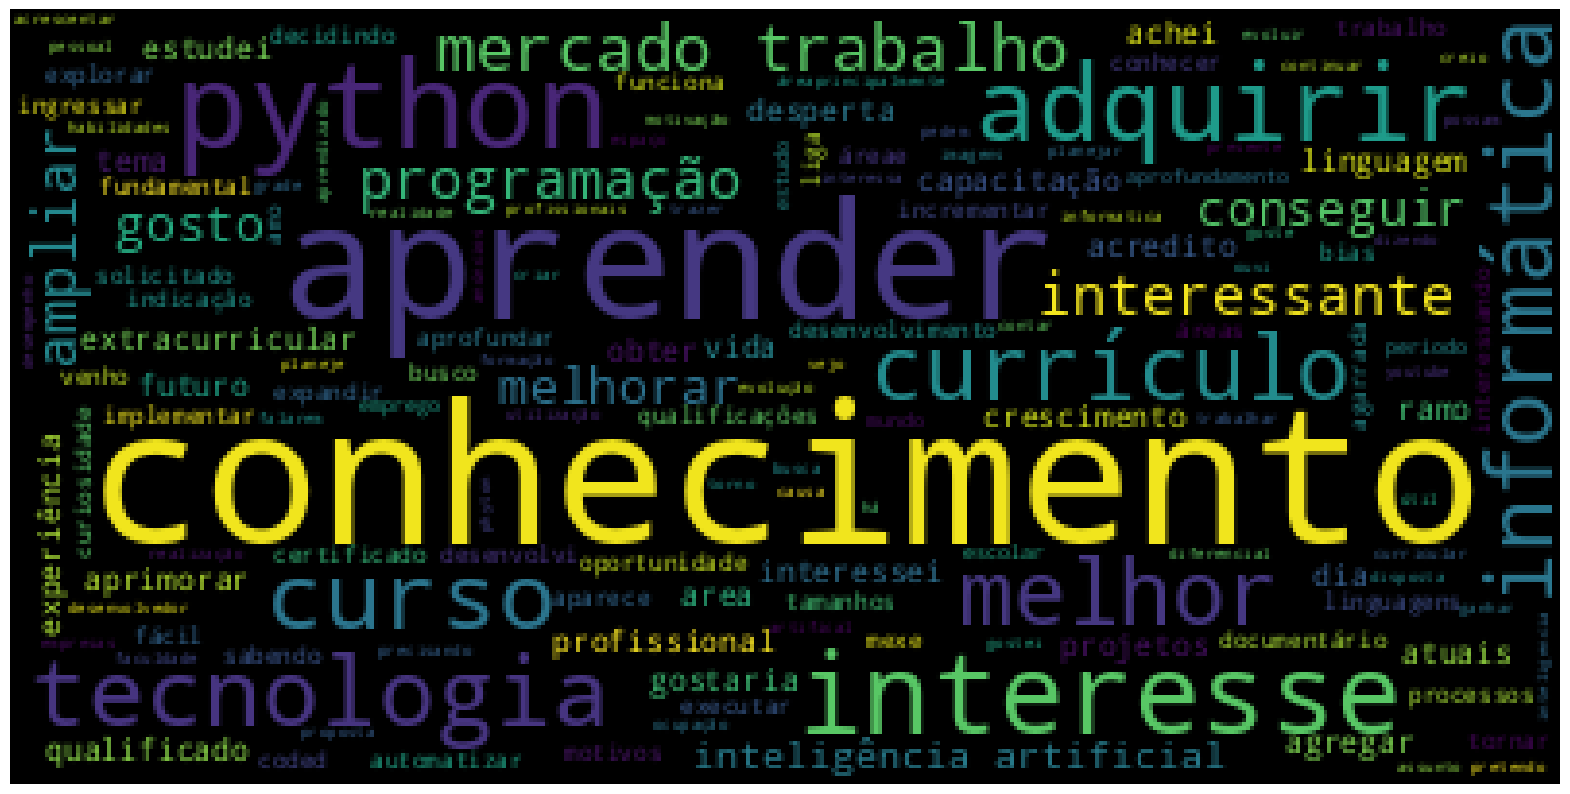

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(juntandotudo))